In [1]:
import scanpy as sc
import snapatac2 as snap
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#first, get the RNA data loaded
expr = sc.read_mtx("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/SCTMatrix_030424_seu.mtx")

In [3]:
cells = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/SCTCells_011024_seu.csv")
cells.head()

,x
0,01_A1:AN:01
1,01_A1:B1:03
2,01_A1:BE:04
3,01_A1:C1:02
4,01_A1:DI:02


In [4]:
gene = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/SCTGenes_011024_seu.csv")
gene.head()

,x
0,TSPAN6
1,TNMD
2,DPM1
3,SCYL3
4,C1orf112


In [5]:
expr.obs_names = cells["x"].to_list()
expr.var_names = gene["x"].to_list()
expr

AnnData object with n_obs × n_vars = 64794 × 19564

In [6]:
meta = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/metadata_011024_seu.csv")
meta.index = meta["barcodes"]
meta.index.name = None
meta.head()

,orig.ident,nCount_RNA,nFeature_RNA,Treatment,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,SCT_snn_res.0.4,seurat_clusters,SCT_snn_res.0.3,RNA_anno,barcodes
01_A1:AN:01,1,7497,3892,Ctrl,5325,3700,-0.062921,-0.012619,G1,1,2,2,Early_FGF2,01_A1:AN:01
01_A1:B1:03,1,3175,2060,0hr,3725,2050,-0.056657,-0.093246,G1,1,1,1,Early_NEK7,01_A1:B1:03
01_A1:BE:04,1,2727,1840,0hr,3651,1834,-0.055581,-0.053016,G1,4,4,4,Early_EPHA7,01_A1:BE:04
01_A1:C1:02,1,4796,2859,Ctrl,4769,2851,0.058400,0.093314,G2M,1,2,2,Early_FGF2,01_A1:C1:02
01_A1:DI:02,1,4486,2678,Ctrl,4471,2663,-0.145539,0.040136,G2M,3,2,2,Early_FGF2,01_A1:DI:02


In [7]:
expr.obs = meta
expr

AnnData object with n_obs × n_vars = 64794 × 19564
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Treatment', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.3', 'RNA_anno', 'barcodes'

In [8]:
pca_cor = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/PCA_cor_011024_seu.csv")
print(sum(pca_cor["barcodes"] == expr.obs.index))
print(pca_cor.shape)

64794
(64794, 51)


In [9]:
pca = pca_cor.drop(columns = ["barcodes"])
pca = pca.to_numpy()
pca.shape

(64794, 50)

In [10]:
expr.obsm["X_pca"] = pca

In [11]:
umap_cor = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/RNA/UMAP_cor_011024_seu.csv")
umap_cor.head()

,UMAP_1,UMAP_2,barcodes
0,-5.917884,0.584975,01_A1:AN:01
1,-3.068458,1.518593,01_A1:B1:03
2,-2.093378,-1.900283,01_A1:BE:04
3,-6.009294,0.136530,01_A1:C1:02
4,-4.813709,1.975196,01_A1:DI:02


In [12]:
sum(umap_cor["barcodes"] == expr.obs.index)

64794

In [13]:
umap = umap_cor.drop(columns = ["barcodes"])
umap = umap.to_numpy()

In [14]:
expr.obsm["X_umap"] = umap

In [15]:
expr

AnnData object with n_obs × n_vars = 64794 × 19564
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Treatment', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.3', 'RNA_anno', 'barcodes'
    obsm: 'X_pca', 'X_umap'

... storing 'Treatment' as categorical
... storing 'Phase' as categorical
... storing 'RNA_anno' as categorical


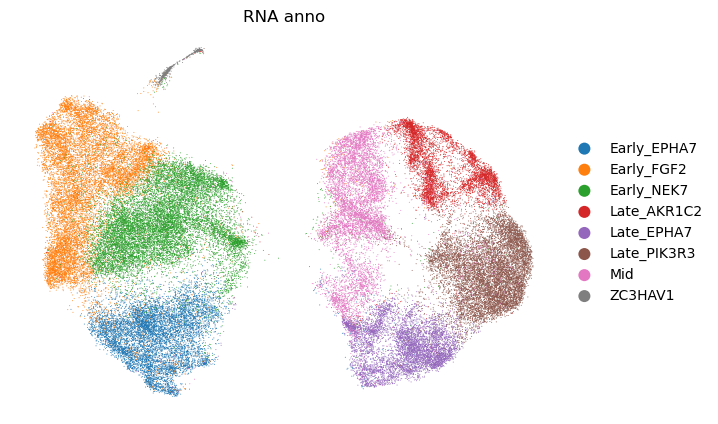

In [16]:
sc.pl.scatter(expr, basis='umap', color='RNA_anno', frameon=False)

In [17]:
#now, do the Damage DNA part 
os.chdir("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/")

treatments = ["Ctrl", "0hr", "2hr", "6hr", "24hr", "48hr"]
obj_list = []
for treatment in treatments:
    file_path = "/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_{}.h5ad".format(treatment)
    obj_list.append(file_path)

data_dirs = list(zip(treatments, obj_list))
data_dirs

[('Ctrl',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_Ctrl.h5ad'),
 ('0hr',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_0hr.h5ad'),
 ('2hr',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_2hr.h5ad'),
 ('6hr',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_6hr.h5ad'),
 ('24hr',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_24hr.h5ad'),
 ('48hr',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/SnapATAC2_whitelist/snapATAC2_48hr.h5ad')]

In [19]:
damage = snap.AnnDataSet(data_dirs, filename = "merged_whitelist.h5ad")
damage

AnnDataSet object with n_obs x n_vars = 64775 x 606219 backed at 'merged_whitelist.h5ad'
contains 6 AnnData objects with keys: 'Ctrl', '0hr', '2hr', '6hr', '24hr', '48hr'
    obs: 'sample'
    uns: 'reference_sequences', 'AnnDataSet'

In [20]:
#investigate the non overlap region
damage_barcodes = damage.obs_names
len(damage_barcodes)

64775

In [21]:
strange = expr[~expr.obs.index.isin(damage_barcodes)]
print(strange.shape)
strange.obs

(19, 19564)


,orig.ident,nCount_RNA,nFeature_RNA,Treatment,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,SCT_snn_res.0.4,seurat_clusters,SCT_snn_res.0.3,RNA_anno,barcodes
03_FF:JN:06,3,1244,1033,2hr,3151,1376,-0.036071,-0.022194,G1,1,2,2,Early_FGF2,03_FF:JN:06
03_I6:GM:06,3,1032,874,2hr,3139,1385,0.049672,-0.028617,S,1,2,2,Early_FGF2,03_I6:GM:06
04_AJ:IJ:06,4,1175,995,2hr,3129,1402,0.082589,-0.007420,S,5,5,5,Mid,04_AJ:IJ:06
04_EV:CR:06,4,1525,1215,2hr,3333,1409,0.075442,0.011683,S,1,2,2,Early_FGF2,04_EV:CR:06
04_F1:LE:06,4,1134,972,2hr,3113,1389,0.087882,0.040511,S,1,2,2,Early_FGF2,04_F1:LE:06
05_CB:JE:06,5,1220,1040,2hr,3138,1412,-0.010625,-0.044115,G1,5,5,5,Mid,05_CB:JE:06
06_IV:EA:06,6,1089,920,2hr,3120,1369,0.069003,-0.056773,S,1,2,2,Early_FGF2,06_IV:EA:06
07_JM:JE:06,7,1223,1038,2hr,3154,1407,0.135679,0.021824,S,1,2,2,Early_FGF2,07_JM:JE:06
07_K2:A6:06,7,1388,1126,2hr,3210,1398,0.041815,-0.035678,S,5,5,5,Mid,07_K2:A6:06
08_BB:KU:06,8,1099,915,2hr,3136,1353,0.025961,-0.019935,S,1,2,2,Early_FGF2,08_BB:KU:06


In [22]:
#subset the expression data to only contains cells presented in both modality
expr_final = expr[expr.obs.index.isin(damage_barcodes)]
expr_final.shape

(64775, 19564)

In [23]:
#get the meta data to add to the damage adata 
col_wanted = ["Treatment", "RNA_anno", "Phase", "barcodes"]
meta = expr.obs[col_wanted]
meta.head()

,Treatment,RNA_anno,Phase,barcodes
01_A1:AN:01,Ctrl,Early_FGF2,G1,01_A1:AN:01
01_A1:B1:03,0hr,Early_NEK7,G1,01_A1:B1:03
01_A1:BE:04,0hr,Early_EPHA7,G1,01_A1:BE:04
01_A1:C1:02,Ctrl,Early_FGF2,G2M,01_A1:C1:02
01_A1:DI:02,Ctrl,Early_FGF2,G2M,01_A1:DI:02


In [24]:
meta_ordered = meta.loc[damage.obs_names]
meta_ordered.head()

,Treatment,RNA_anno,Phase,barcodes
01_A1:AN:01,Ctrl,Early_FGF2,G1,01_A1:AN:01
01_A1:C1:02,Ctrl,Early_FGF2,G2M,01_A1:C1:02
01_A1:DI:02,Ctrl,Early_FGF2,G2M,01_A1:DI:02
01_A1:HR:02,Ctrl,Early_NEK7,S,01_A1:HR:02
01_A1:JE:02,Ctrl,Early_EPHA7,G2M,01_A1:JE:02


In [25]:
#update the damage observation
damage.obs = meta_ordered
damage

AnnDataSet object with n_obs x n_vars = 64775 x 606219 backed at 'merged_whitelist.h5ad'
contains 6 AnnData objects with keys: 'Ctrl', '0hr', '2hr', '6hr', '24hr', '48hr'
    obs: 'Treatment', 'RNA_anno', 'Phase', 'barcodes'
    uns: 'reference_sequences', 'AnnDataSet'

In [26]:
#save the data and close everything
damage.close()

In [27]:
expr_final

View of AnnData object with n_obs × n_vars = 64775 × 19564
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Treatment', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.3', 'RNA_anno', 'barcodes'
    uns: 'RNA_anno_colors'
    obsm: 'X_pca', 'X_umap'

In [28]:
expr_final.write("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/Joint_finalist/RNA_SCT.h5ad")